In [1]:
import pandas as pd 

In [4]:
data = pd.read_csv("../data/MS_GSE21942.csv")

In [5]:
data.head()

,BOD1L1,IFI27,MALAT1,HBG2,LTF,HBG2.1,HBG1,SAMSN1,MALAT1.1,MALAT1.2,...,EIF2S3,MOB3A,SNRNP40,MDM4,MAT2A,ZNF595,LAMP1,CLEC7A,SERPINB9,Outcome
0,9.1,6.7,372.7,13.9,12.9,36.7,42.2,8.5,58.8,130.4,...,971.7,224.5,144.6,105.2,165.4,18.9,276.6,226.4,37.9,0
1,10.4,103.7,604.7,87.7,11.5,100.4,103.7,50.2,89.1,208.0,...,726.2,155.6,106.1,105.2,146.7,36.3,185.8,448.3,37.1,0
2,15.1,6.5,1492.0,45.8,8.2,36.8,58.1,36.6,82.3,250.0,...,1046.2,129.7,126.0,60.8,98.3,9.3,228.0,301.0,30.7,0
3,8.4,5.3,893.8,12.8,86.9,9.1,12.2,11.3,71.6,165.6,...,778.3,147.6,165.4,87.2,122.4,17.2,200.8,209.4,27.9,0
4,10.3,5.2,703.9,67.6,7.7,46.9,57.8,12.4,78.0,194.0,...,814.1,140.3,149.6,72.4,134.3,116.5,223.9,256.1,29.0,0


In [6]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'Outcome', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(29, 51)"
4,Transformed data shape,"(29, 51)"
5,Transformed train set shape,"(20, 51)"
6,Transformed test set shape,"(9, 51)"
7,Numeric features,50
8,Preprocess,True
9,Imputation type,simple


In [17]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [7]:
# available models 
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [8]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0070
lr,Logistic Regression,0.9500,1.0000,0.9000,0.9000,0.9000,0.9000,0.9000,0.6490
knn,K Neighbors Classifier,0.9500,0.9500,0.9000,0.9000,0.9000,0.9000,0.9000,0.3560
rf,Random Forest Classifier,0.9500,1.0000,0.9000,0.9000,0.9000,0.9000,0.9000,0.0290
gbc,Gradient Boosting Classifier,0.9500,1.0000,0.9000,0.9000,0.9000,0.9000,0.9000,0.0130
lda,Linear Discriminant Analysis,0.9500,1.0000,0.9000,0.9000,0.9000,0.9000,0.9000,0.0070
et,Extra Trees Classifier,0.9500,1.0000,0.9000,0.9000,0.9000,0.9000,0.9000,0.0240
catboost,CatBoost Classifier,0.9500,1.0000,0.9000,0.9000,0.9000,0.9000,0.9000,0.4710
dt,Decision Tree Classifier,0.9000,0.9000,0.9000,0.8500,0.8667,0.8000,0.8000,0.0060
svm,SVM - Linear Kernel,0.9000,1.0000,0.9000,0.8500,0.8667,0.8000,0.8000,0.0060


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

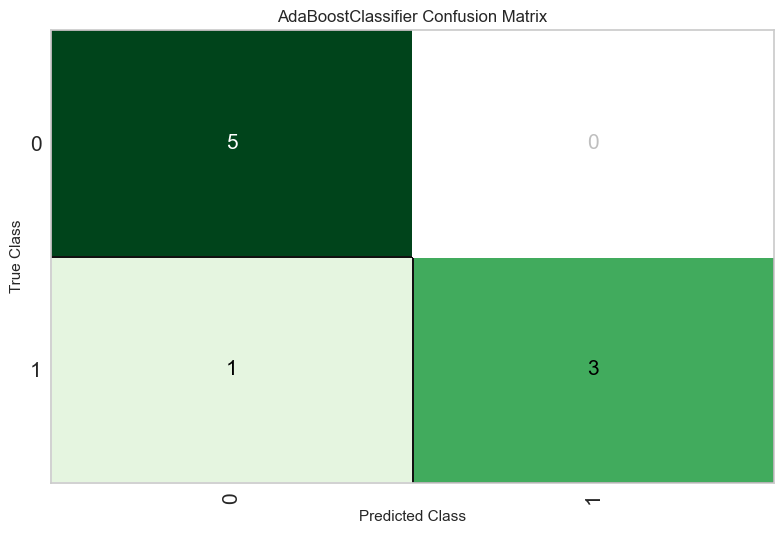

In [9]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

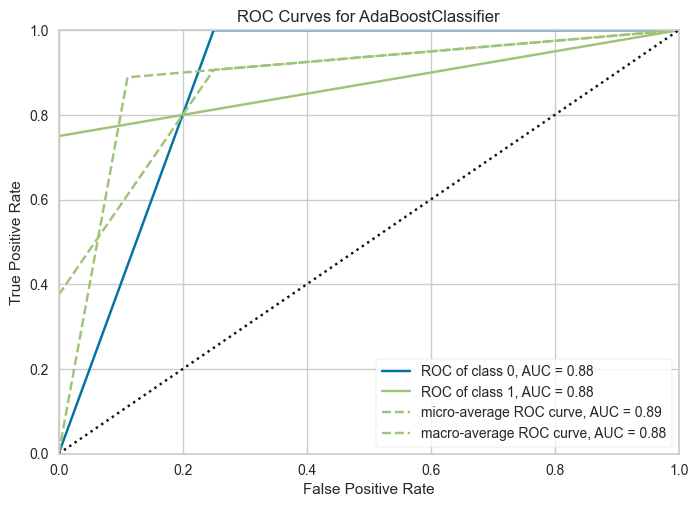

In [10]:
# plot AUC
plot_model(best, plot = 'auc')

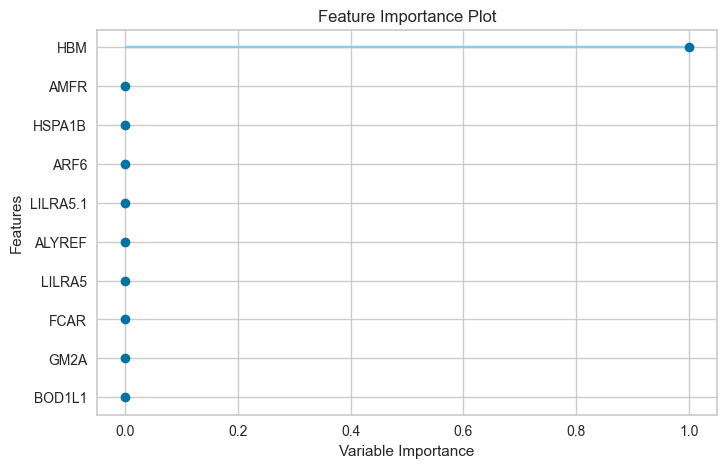

In [11]:
# plot feature importance
plot_model(best, plot = 'feature')

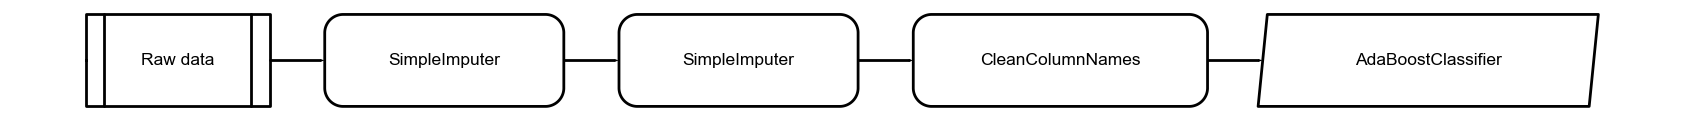

In [12]:
evaluate_model(best)

In [13]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.8889,0.8750,0.7500,1.0000,0.8571,0.7692,0.7906


In [14]:
# show predictions df
holdout_pred.head()

,BOD1L1,IFI27,MALAT1,HBG2,LTF,HBG2.1,HBG1,SAMSN1,MALAT1.1,MALAT1.2,...,SNRNP40,MDM4,MAT2A,ZNF595,LAMP1,CLEC7A,SERPINB9,Outcome,prediction_label,prediction_score
12,9.300000,5.4,837.099976,38.700001,23.200001,39.099998,48.099998,14.400000,40.099998,58.000000,...,154.899994,46.400002,122.400002,43.500000,32.400002,429.000000,23.799999,0,0,1.0
27,8.600000,5.3,1098.099976,498.500000,404.299988,431.000000,401.700012,15.500000,81.300003,189.100006,...,79.400002,26.299999,90.900002,22.600000,88.500000,155.300003,12.500000,1,1,1.0
14,8.400000,4.9,279.100006,14.500000,8.000000,10.000000,16.900000,10.100000,65.000000,142.600006,...,145.000000,122.400002,187.199997,28.500000,279.299988,410.299988,32.400002,0,0,1.0
15,286.799988,5.3,11997.400391,774.900024,125.199997,623.500000,676.599976,169.899994,1274.300049,2101.199951,...,17.100000,23.900000,23.799999,8.100000,57.799999,68.699997,8.000000,1,1,1.0
24,13.500000,5.4,838.099976,129.899994,259.600006,81.900002,71.400002,39.500000,60.200001,138.199997,...,99.599998,37.700001,95.400002,55.799999,163.100006,186.899994,23.200001,1,0,1.0


In [15]:
# copy data and drop Outcome variable
new_data = data.copy()
new_data.drop('Outcome', axis=1, inplace=True)
new_data.head()

,BOD1L1,IFI27,MALAT1,HBG2,LTF,HBG2.1,HBG1,SAMSN1,MALAT1.1,MALAT1.2,...,HINT3.2,EIF2S3,MOB3A,SNRNP40,MDM4,MAT2A,ZNF595,LAMP1,CLEC7A,SERPINB9
0,9.1,6.7,372.7,13.9,12.9,36.7,42.2,8.5,58.8,130.4,...,32.7,971.7,224.5,144.6,105.2,165.4,18.9,276.6,226.4,37.9
1,10.4,103.7,604.7,87.7,11.5,100.4,103.7,50.2,89.1,208.0,...,122.8,726.2,155.6,106.1,105.2,146.7,36.3,185.8,448.3,37.1
2,15.1,6.5,1492.0,45.8,8.2,36.8,58.1,36.6,82.3,250.0,...,134.9,1046.2,129.7,126.0,60.8,98.3,9.3,228.0,301.0,30.7
3,8.4,5.3,893.8,12.8,86.9,9.1,12.2,11.3,71.6,165.6,...,79.4,778.3,147.6,165.4,87.2,122.4,17.2,200.8,209.4,27.9
4,10.3,5.2,703.9,67.6,7.7,46.9,57.8,12.4,78.0,194.0,...,122.4,814.1,140.3,149.6,72.4,134.3,116.5,223.9,256.1,29.0


In [16]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,BOD1L1,IFI27,MALAT1,HBG2,LTF,HBG2.1,HBG1,SAMSN1,MALAT1.1,MALAT1.2,...,MOB3A,SNRNP40,MDM4,MAT2A,ZNF595,LAMP1,CLEC7A,SERPINB9,prediction_label,prediction_score
0,9.1,6.700000,372.700012,13.900000,12.900000,36.700001,42.200001,8.500000,58.799999,130.399994,...,224.500000,144.600006,105.199997,165.399994,18.900000,276.600006,226.399994,37.900002,0,1.0
1,10.4,103.699997,604.700012,87.699997,11.500000,100.400002,103.699997,50.200001,89.099998,208.000000,...,155.600006,106.099998,105.199997,146.699997,36.299999,185.800003,448.299988,37.099998,0,1.0
2,15.1,6.500000,1492.000000,45.799999,8.200000,36.799999,58.099998,36.599998,82.300003,250.000000,...,129.699997,126.000000,60.799999,98.300003,9.300000,228.000000,301.000000,30.700001,0,1.0
3,8.4,5.300000,893.799988,12.800000,86.900002,9.100000,12.200000,11.300000,71.599998,165.600006,...,147.600006,165.399994,87.199997,122.400002,17.200001,200.800003,209.399994,27.900000,0,1.0
4,10.3,5.200000,703.900024,67.599998,7.700000,46.900002,57.799999,12.400000,78.000000,194.000000,...,140.300003,149.600006,72.400002,134.300003,116.500000,223.899994,256.100006,29.000000,0,1.0
